In [100]:
import numpy as np
import json
from matplotlib import pyplot as plt

In [101]:
with open('data/molecule_data.json', 'r') as jfile:
    molecule_geometries = json.load(jfile)
with open('data/score_data.json', 'r') as infile:
    scoring_data = json.load(infile)

In [102]:
molecules = list(scoring_data.keys())
print(molecules)

['HCN_STO-3G_SINGLET', 'HCl_STO-3G_SINGLET', 'F2_STO-3G_SINGLET', 'N2_STO-3G_SINGLET', 'SiH4_STO-3G_SINGLET', 'H2S_STO-3G_SINGLET', 'CH4_STO-3G_SINGLET', 'HOOH_STO-3G_SINGLET', 'H2O_STO-3G_SINGLET', 'BeH2_STO-3G_SINGLET', 'Be_STO-3G_SINGLET', 'HF_STO-3G_SINGLET', 'LiH_STO-3G_SINGLET', 'BeH+_STO-3G_SINGLET', 'NH3_STO-3G_SINGLET', 'NaCl_STO-3G_SINGLET', 'O3_STO-3G_SINGLET', 'O2_STO-3G_SINGLET', 'C2H5F_STO-3G_SINGLET', 'C2H6_STO-3G_SINGLET', 'CO2_STO-3G_SINGLET', 'CH3COCH3_STO-3G_SINGLET', 'CH3OCH3_STO-3G_SINGLET', 'CHONH2_STO-3G_SINGLET', 'CH3CHOHCH3_STO-3G_SINGLET', 'CH3CHO_STO-3G_SINGLET', 'CH3CN_STO-3G_SINGLET', 'CH3OH_STO-3G_SINGLET', 'CH3CH2OH_STO-3G_SINGLET', 'CH3CH2NH2_STO-3G_SINGLET', 'CH3NHCH3_STO-3G_SINGLET']


In [103]:
speciesname = 'CH3CHOHCH3_STO-3G_SINGLET'
data = scoring_data[speciesname]
n_qubits = data['n_qubits_post_taper']
hf_energy = data['hf_energy']
mp2_energy = data['mp2_energy']
ccsd_energy = data['ccsd_energy']
fci_energy = data['fci_energy']
energies = data['cs_vqe_energies']
scores = data['stabilizer_score']

In [104]:
plot_mols = [mol for mol in molecules if scoring_data[mol]['fci_energy'] is not None]
len(plot_mols)

20

# Plot the larger molecules for which FCI is too expensive

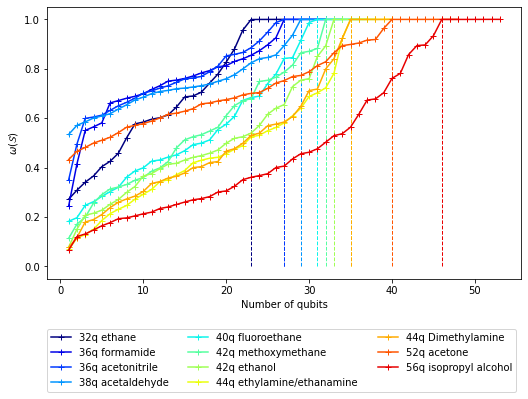

In [150]:
from matplotlib import cm

plot_mols = [mol for mol in molecules if scoring_data[mol]['fci_energy'] is None]
mol_order = sorted([(mol, scoring_data[mol]['n_qubits_pre_taper']) for mol in plot_mols], key=lambda x:x[1])
mol_order, qubits = zip(*mol_order)

fig,score_axis = plt.subplots(figsize=(8.5,5))

for index, speciesname in enumerate(mol_order):
    name = molecule_geometries[speciesname]['name']
    data = scoring_data[speciesname]
    n_qubits = data['n_qubits_post_taper']
    n_qubits_full = data['n_qubits_pre_taper']
    scores = np.array(data['stabilizer_score'])
    scored_1 = np.where(scores>0.99)[0][0]
    
    c = plt.cm.jet(index/len(plot_mols))
    X = np.arange(len(scores))+1
    score_axis.plot(X,scores, color=c, marker='+', label=f'{n_qubits_full}q {name}')
    score_axis.vlines(scored_1+1, 0, 1, color=c, ls='--', lw=1)

score_axis.set_xlabel('Number of qubits')
score_axis.set_ylabel('$\omega(\mathcal{S})$')
fig.legend(ncol=3, bbox_to_anchor=(0.9,0))
plt.show()

In [151]:
fig.savefig('plots/large_molecules.png', dpi=300, bbox_inches='tight')

In [125]:


for speciesname in mol_order:
    name = molecule_geometries[speciesname]['name']
    data = scoring_data[speciesname]
    n_qubits = data['n_qubits_post_taper']
    n_qubits_full = data['n_qubits_pre_taper']
    scores = np.array(data['stabilizer_score'])
    scored_1 = np.where(scores>0.99)[0][0]
    frmat = speciesname[:speciesname.find('_')]
    print(f'{name} & \ce{ {frmat} } & {n_qubits_full} & {n_qubits} & {scored_1} \\\\')

ethane & \ce{'C2H6'} & 32 & 28 & 22 \\
formamide & \ce{'CHONH2'} & 36 & 33 & 26 \\
acetonitrile & \ce{'CH3CN'} & 36 & 33 & 26 \\
acetaldehyde & \ce{'CH3CHO'} & 38 & 35 & 28 \\
fluoroethane & \ce{'C2H5F'} & 40 & 37 & 30 \\
methoxymethane & \ce{'CH3OCH3'} & 42 & 38 & 31 \\
ethanol & \ce{'CH3CH2OH'} & 42 & 39 & 32 \\
ethylamine/ethanamine & \ce{'CH3CH2NH2'} & 44 & 41 & 34 \\
Dimethylamine & \ce{'CH3NHCH3'} & 44 & 41 & 34 \\
acetone & \ce{'CH3COCH3'} & 52 & 49 & 39 \\
isopropyl alcohol & \ce{'CH3CHOHCH3'} & 56 & 54 & 45 \\


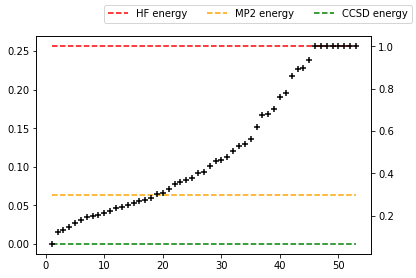

In [88]:
ref_energy = ccsd_energy

fig,energy_axis = plt.subplots()
X=np.arange(1, n_qubits)

Y_energy=np.array(energies)-ref_energy
energy_axis.plot(X[:0], Y_energy, color='black')
energy_axis.hlines(hf_energy-ref_energy, 1, X[-1], ls='--', color='red', label='HF energy')
energy_axis.hlines(mp2_energy-ref_energy, 1, X[-1], ls='--', color='orange', label='MP2 energy')
energy_axis.hlines(ccsd_energy-ref_energy, 1, X[-1], ls='--', color='green', label='CCSD energy')
#energy_axis.hlines(0.0016, 1, X[-1], ls='--', color='black', label='Chemical accuracy')

#energy_axis.set_ylim(1e-15, 1e-0) 
#energy_axis.set_yscale('log')

score_axis = energy_axis.twinx()
Y_scores=np.array(scores)
score_axis.scatter(X, Y_scores, color='black', marker='+')

#energy_axis.set_xticks(X)

fig.legend(ncol=4)
plt.show()